# Probability that a given observation is part of a bootstrap sample?

"The bootstrap is a widely applicable and extremely powerful statistical tool that can be used to quantify the uncertainty associated with a given estimator or statistical learning method." This is how Section 5.2 of the book [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), writen by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani, begins. Bootstrap can be used  to estimate the standard errors of the coefficients from a linear regression and is the conceptual bais for some tree ensemble algorithms. 

This post is not devoted the bootstrap itself but rather about understanding the often encountered statement:

*On average, each bootstrap sample makes use of around two-thirds of the observations*. 

What does this mean and why it is true?

Recall that a bootstrap sample of \\(n\\) observations is just a to randomly choose \\(n\\) observations with repetition. 

**Aim:** Derive the probability that a given observation is part of a bootstrap sample. 

To do this we are going to follow the lines of the Excercise 5.4.2 of the book  [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/). We are going to use Python despite the fact that this reference uses mainly R.

## Solution of Excercise 5.4.2

Suppose that we obtain a bootstrap sample from a set of \\(n\\) observations \\(x_1, ..., x_n\\).

**(a)** What is the probability that the first bootstrap observation is *not* the \\(j\\)-th observation from the original sample? 

Let us denote this probability by \\(\pi_j\\). As the probability of selecting a particular \\(x_j\\) from the set \\(x_1, ..., x_n\\) is \\(1/n\\), then the desired probability is 

\begin{equation*}
\pi_j = 1-\frac{1}{n}
\end{equation*}

**(b)** What is the probability that the second bootstrap observation is *not* the \\(j\\)-th observation from the original sample?

Well, it is not hard to see that, as the selections are independent then, this probability is again \\(\pi_j\\). 

**(c)** Argue that the probability \\(p_j(n)\\) that the \\(j\\)-th observation is not in the bootstrap sample is \\((1 − 1/n)^n\\).

It is straight forward to see from (a) and (b) that this probability is given by

\begin{equation*}
p_j(n)=
\prod_{i=1}^n \pi_j = \left(1-\frac{1}{n}\right)\left(1-\frac{1}{n}\right)\cdots\left(1-\frac{1}{n}\right) =\left(1-\frac{1}{n}\right)^n.
\end{equation*}

Let us define a function which computes this probability.

In [1]:
def probability(n):
    return (1 - 1/n)**n

**(d)** When \\(n = 5\\), what is the probability that the \\(j\\)-th observation is in the bootstrap sample?

In [2]:
# This is simply:
1 - probability(5)

0.6723199999999999

**(e)** When \\(n = 100\\), what is the probability that the \\(j\\)-th observation is in the bootstrap sample?

In [3]:
1 - probability(100)

0.6339676587267709

**(f)** When \\(n = 10000\\), what is the probability that the \\(j\\)-th observation is in the bootstrap sample?

In [4]:
1 - probability(1e4)

0.6321389535670295

**(d)** Create a plot that displays, for each integer value of \\(n\\) from \\(1\\) to \\(100,000\\), the probability that the \\(j\\)-th observation is in the bootstrap sample. Comment on what you observe.

We first do it for \\(n\\) from \\(1\\) to \\(50\\):

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

def generate_plot(sample_size_max):
    
    sample_sizes = np.arange(sample_size_max, dtype=float)

    probability_sequence = [1 - probability(n+1) for n in sample_sizes]
    
    plt.figure(figsize=(9, 7))
    plt.plot(sample_sizes, probability_sequence, marker='o')
    plt.plot(sample_sizes, probability_sequence, color='red')
    plt.title('Probability Sequence')
    plt.xlabel('Sample Size')
    plt.ylabel('probability the j-th observation is in the bootstrap');

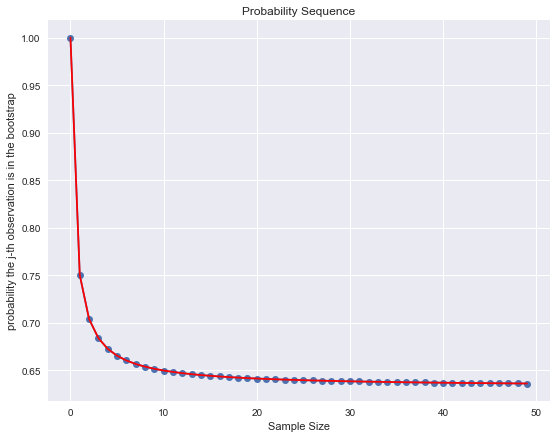

In [6]:
generate_plot(50);

Now we do it for $n$ from 1 to 100,000:

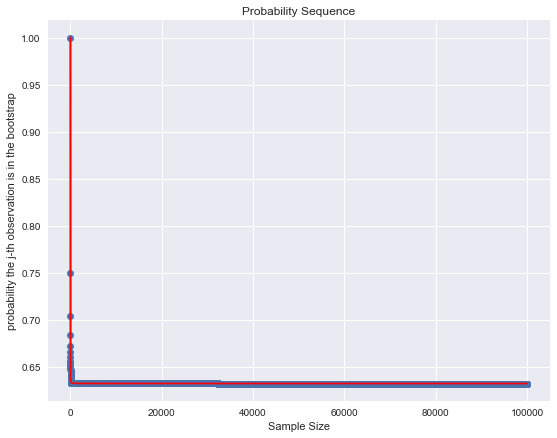

In [7]:
generate_plot(1e5);

Clearly this probabilities are converging! But, to which value?

Recall that the [exponential function](https://en.wikipedia.org/wiki/Exponential_function) satisfies:

\begin{equation*}
e^x = \lim_{n\rightarrow \infty} \left(1+\frac{x}{n}\right)^n
\end{equation*}

Hence, we easily see that

\begin{equation*}
p_j := \lim_{n\rightarrow \infty}p_j(n) = e^{-1} \approx 0.3678794
\end{equation*}

Therefore the limit as $n$ increases of the probability the \\(j\\)-th observation is in the bootstrap is:

In [8]:
1 - np.exp(-1) # Which is roughly 2/3.

0.6321205588285577

Let us plot this:

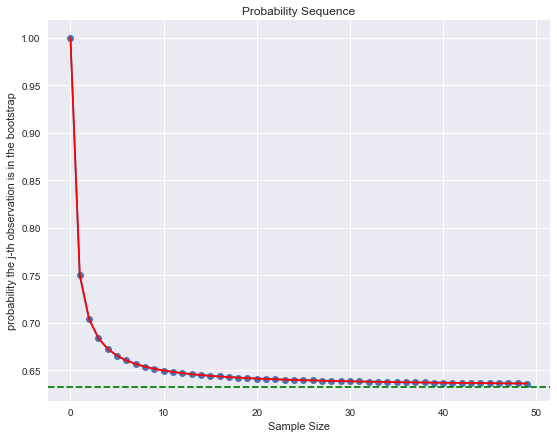

In [9]:
generate_plot(50)
plt.axhline(y= 1- np.exp(-1) , color='g', linestyle='--');

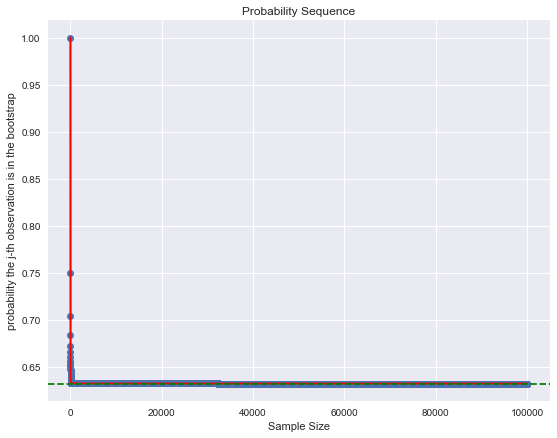

In [10]:
generate_plot(1e5)
plt.axhline(y= 1- np.exp(-1) , color='g', linestyle='--');

**(h)** We will now investigate numerically the probability that a boot- strap sample of size \\(n = 100\\) contains the \\(j\\)-th observation. Here \\(j = 4\\). We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.

We write this function as:

In [11]:
num_iterations = int(1e5)

n = 100
j = 4

store = np.empty(num_iterations)

for i in range(0,num_iterations) :
    store[i] = (np.random.choice(n, n)==4).sum() > 0
    
store.mean()

0.63293

This value is quite close to \\(1-e^{-1}\\).

In [12]:
abs(store.mean() - (1 - np.exp(-1)))

0.0008094411714423266

Let us go a step further as do this computation many times!

We define the function:

In [13]:
def get_probability(num_iterations, n, j):
    
    store = [
        (np.random.choice(n, n) == j).sum() > 0 
        for i in range(0, num_iterations)
    ]
    
    store = np.array(store)
    
    return store.mean()

Store the results in an array:

In [14]:
def simulation(n, j, N):
    
    simulation_array = [
        get_probability(num_iterations, n, j) 
        for i in range(0, N)
    ]
    
    return np.array(simulation_array)

We run the simulations:

In [15]:
simulation_array = simulation(n, j, N=200)

Let us see the histogram of the samples:

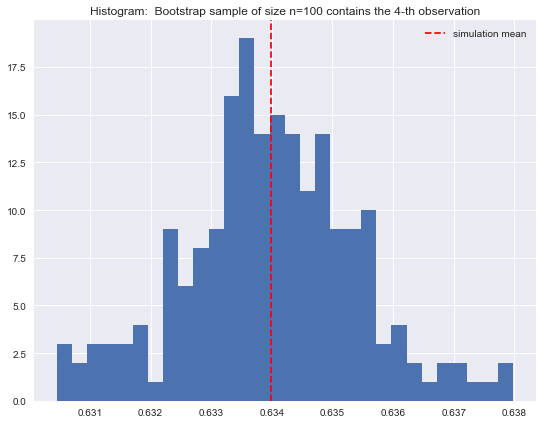

In [16]:
plt.figure(figsize=(9, 7))
plt.hist(simulation_array, bins=30)  
plt.axvline(simulation_array.mean(), color='red', linestyle='--', label='simulation mean')
plt.legend()
plt.title(f'Histogram:  Bootstrap sample of size n=100 contains the {j}-th observation');

If we compute the mean:

In [17]:
simulation_array.mean()

0.63398585

and compare it with

In [18]:
1 - probability(n)

0.6339676587267709

In [19]:
abs(simulation_array.mean() - (1 - probability(n)))

1.819127322910674e-05

We get the expected result!